### Recursive Feature Elimination w/ Cross-Validation

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [2]:
# import sample data
my_df = pd.read_csv('feature_selection_sample_data.csv')
my_df.head()

,output,input1,input2,input3,input4
0,564,534,536,466,599
1,182,264,103,244,519
2,323,272,339,609,474
3,438,416,444,330,582
4,547,520,464,104,412


In [3]:
# seperate input and output variables
X = my_df.drop(['output'], axis = 1) # axis=1 drops column
y = my_df['output']

In [4]:
# instantiate regression and feature selecter object
regressor = LinearRegression()
feature_selector = RFECV(regressor, cv = 5) # cv how many chunks to split data in

In [5]:
# learn relationships
fit = feature_selector.fit(X, y)

In [8]:
# determine optimal number of features based on cross validation
optimal_feature_count = feature_selector.n_features_
print(f'Optimal Number of Features: {optimal_feature_count}')

Optimal Number of Features: 2


In [11]:
# create new dataframe with selected features
X_new = X.loc[:, feature_selector.get_support()]
X_new.head()

,input1,input2
0,534,536
1,264,103
2,272,339
3,416,444
4,520,464


Algorithm determined input3 and input4 addded no additional accuracy or performance to our model.

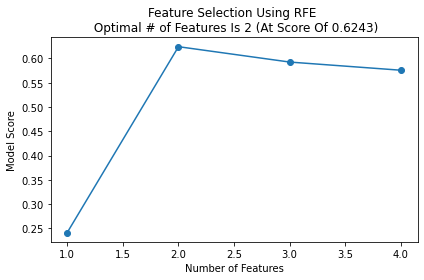

In [14]:
# plot results to visually determine best number of features
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection Using RFE \n Optimal # of Features Is {optimal_feature_count} (At Score Of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()